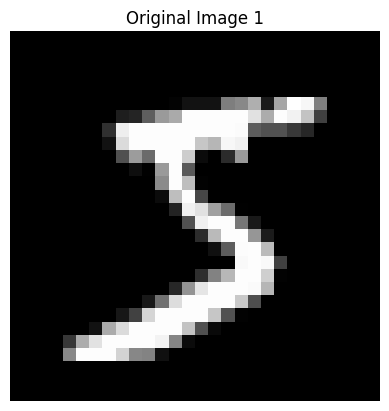

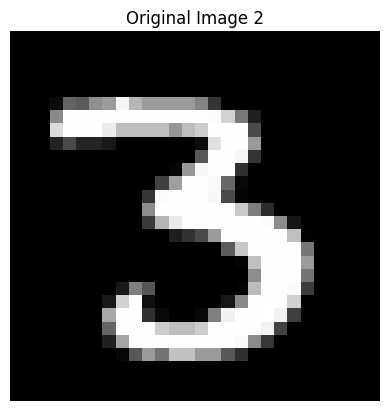

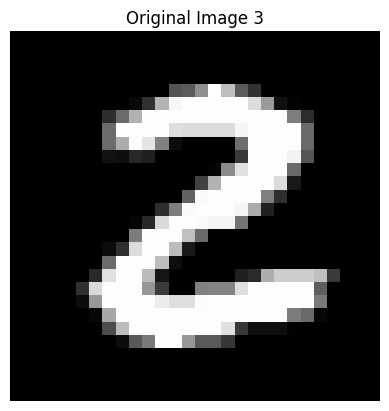

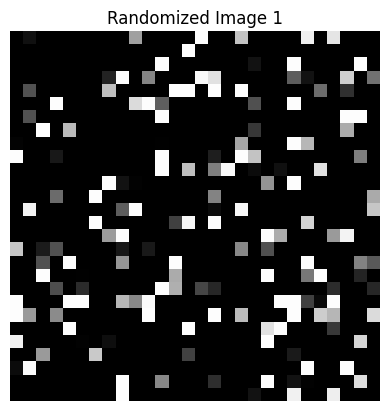

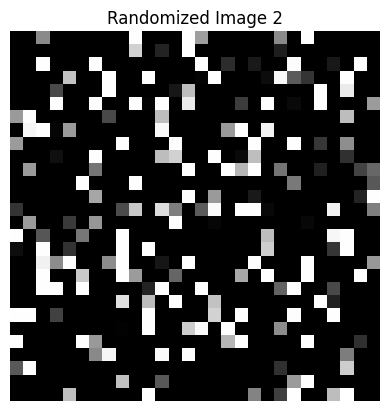

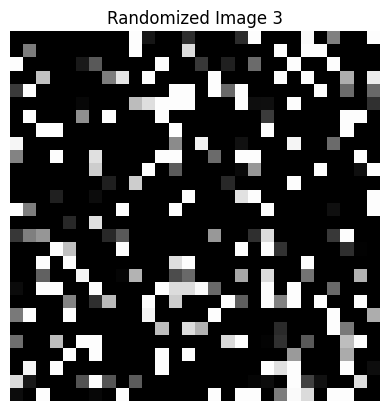

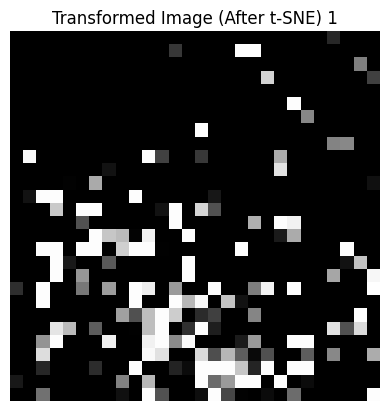

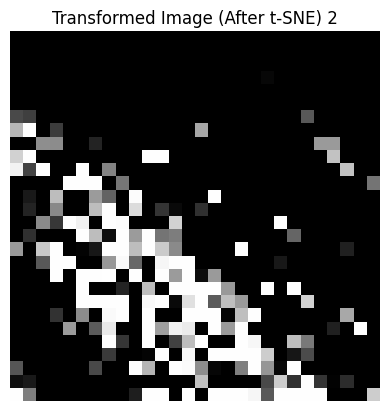

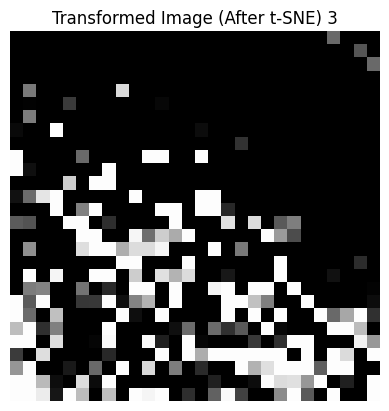

In [2]:
import torch
import torchvision
from sklearn.manifold import TSNE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

def plot_image(image, title=""):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def apply_tsne_embedding(trainset, testset, visualize=False):
    # Concatenate training and testing data to apply t-SNE on the entire dataset
    full_data = torch.cat((trainset.data, testset.data), dim=0)
    full_labels = torch.cat((trainset.targets, testset.targets), dim=0)

    # Select an image to display before and after transformation (just for visualization)
    img_idx1 = 0
    img_idx2 = 12
    img_idx3 = 25 # Index of the image to display (you can modify this for other images)
    original_image1 = full_data[img_idx1].numpy()
    original_image2 = full_data[img_idx2].numpy()
    original_image3 = full_data[img_idx3].numpy()

    # Plot the original image
    plot_image(original_image1, "Original Image 1")
    plot_image(original_image2, "Original Image 2")
    plot_image(original_image3, "Original Image 3")


    # Flatten images and randomize the features
    flattened_data = full_data.view(full_data.size(0), -1).numpy()
    randomized_data = flattened_data[:, np.random.permutation(flattened_data.shape[1])]

    # Randomized image
    randomized_image1 = randomized_data[img_idx1].reshape(28, 28)
    randomized_image2 = randomized_data[img_idx2].reshape(28, 28)
    randomized_image3 = randomized_data[img_idx3].reshape(28, 28)

    # Plot the randomized image
    plot_image(randomized_image1, "Randomized Image 1")
    plot_image(randomized_image2, "Randomized Image 2")
    plot_image(randomized_image3, "Randomized Image 3")

    # Transpose to treat features as "samples" in t-SNE
    transposed_data = randomized_data.T

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=40, metric="euclidean", max_iter=300, random_state=0)
    tsne_coordinates = tsne.fit_transform(transposed_data)

    if visualize:
        # Plot the t-SNE embedding
        plt.figure(figsize=(8, 6))
        plt.scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1], c='blue', alpha=0.5, label="t-SNE Features")
        plt.title("t-SNE Embedding")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Define a grid of 28x28 coordinates
    grid_coords = np.array([(x, y) for x in range(28) for y in range(28)])

    # Compute the cost matrix (distances between t-SNE points and grid points)
    cost_matrix = np.linalg.norm(tsne_coordinates[:, None, :] - grid_coords[None, :, :], axis=2)

    # Apply the Hungarian algorithm for optimal assignment
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Visualize Hungarian mapping if requested
    if visualize:
        plt.figure(figsize=(8, 6))
        plt.scatter(grid_coords[:, 0], grid_coords[:, 1], c='red', alpha=0.5, label="Grid Points")
        plt.scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1], c='blue', alpha=0.5, label="t-SNE Features")
        for tsne_idx, grid_idx in enumerate(col_ind):
            tsne_point = tsne_coordinates[tsne_idx]
            grid_point = grid_coords[grid_idx]
            plt.plot([tsne_point[0], grid_point[0]], [tsne_point[1], grid_point[1]], 'k--', alpha=0.5)
        plt.title("t-SNE Mapping with Hungarian Algorithm")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Map features to the grid based on the optimal assignment
    reordered_data = np.zeros((full_data.size(0), 1, 28, 28))

    for img_idx in range(full_data.size(0)):
        feature_vector = transposed_data[:, img_idx]
        grid = np.zeros((28, 28))

        for feature_idx, grid_idx in enumerate(col_ind):
            x, y = grid_coords[grid_idx]
            grid[x, y] = feature_vector[feature_idx]

        reordered_data[img_idx, 0] = grid  # Place the updated grid in the final dataset array
            # After the t-SNE transformation and feature reorganization, plot the transformed image
    transformed_image1 = reordered_data[img_idx1, 0].reshape(28,28)  # Grab the transformed image
    transformed_image2 = reordered_data[img_idx2, 0].reshape(28,28)
    transformed_image3 = reordered_data[img_idx3, 0].reshape(28,28)

    # Plot the transformed image
    plot_image(transformed_image1, "Transformed Image (After t-SNE) 1")
    plot_image(transformed_image2, "Transformed Image (After t-SNE) 2")
    plot_image(transformed_image3, "Transformed Image (After t-SNE) 3")

apply_tsne_embedding(trainset, testset)


Using device: cuda
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 12.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 350kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.68MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



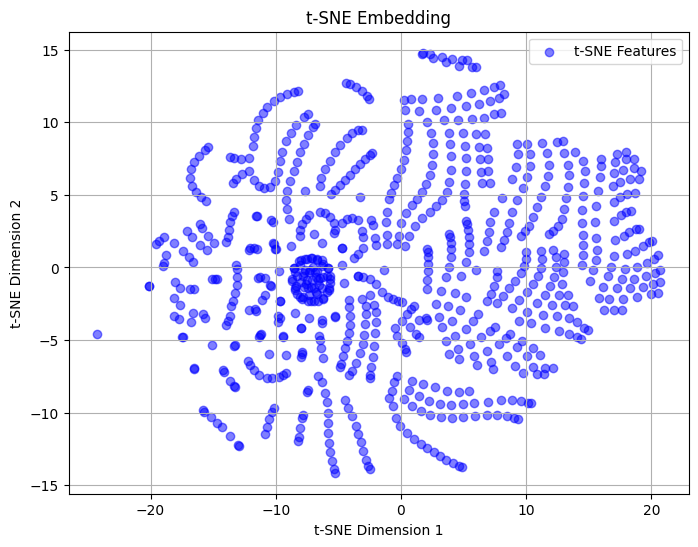

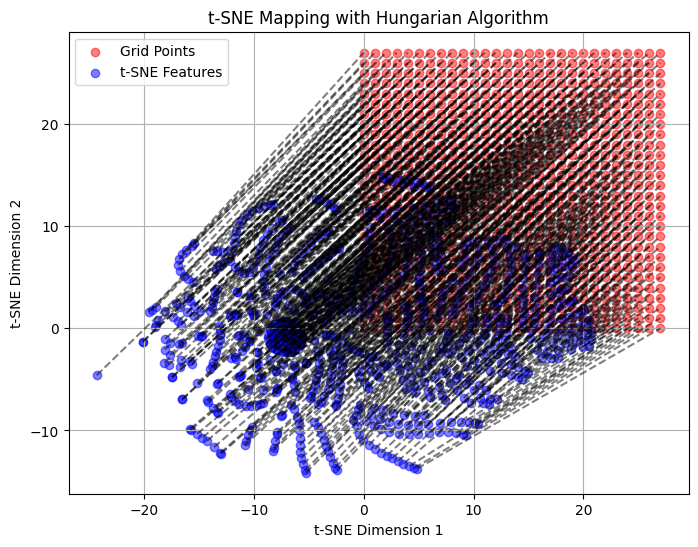


--- Trial 1 ---
Epoch 1/16, Loss: 0.44341827919091115
Epoch 2/16, Loss: 0.17287876734386948
Epoch 3/16, Loss: 0.13316607474089304
Epoch 4/16, Loss: 0.11146853097738313
Epoch 5/16, Loss: 0.10005681613794784
Epoch 6/16, Loss: 0.08818412661790224
Epoch 7/16, Loss: 0.08333012661827144
Epoch 8/16, Loss: 0.07105952536311573
Epoch 9/16, Loss: 0.06736960471288161
Epoch 10/16, Loss: 0.06363163868269472
Epoch 11/16, Loss: 0.059550410983647765
Epoch 12/16, Loss: 0.057693642829752416
Epoch 13/16, Loss: 0.054443576665237615
Epoch 14/16, Loss: 0.05573362015614804
Epoch 15/16, Loss: 0.04873380903080533
Epoch 16/16, Loss: 0.044153045880358364
Accuracy: 95.77%

--- Trial 2 ---
Epoch 1/16, Loss: 0.3942559787801016
Epoch 2/16, Loss: 0.17207227759500113
Epoch 3/16, Loss: 0.12836064313099518
Epoch 4/16, Loss: 0.11286046140730929
Epoch 5/16, Loss: 0.09807938740212423
Epoch 6/16, Loss: 0.08668314608725916
Epoch 7/16, Loss: 0.07348066786523047
Epoch 8/16, Loss: 0.0757654511823015
Epoch 9/16, Loss: 0.06575257

96.171

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.manifold import TSNE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

def apply_tsne_embedding(trainset, testset, visualize=False):
    # Concatenate training and testing data to apply t-SNE on the entire dataset
    full_data = torch.cat((trainset.data, testset.data), dim=0)
    full_labels = torch.cat((trainset.targets, testset.targets), dim=0)

    # Flatten images and randomize the features
    flattened_data = full_data.view(full_data.size(0), -1).numpy()
    randomized_data = flattened_data[:, np.random.permutation(flattened_data.shape[1])]

    # Transpose to treat features as "samples" in t-SNE
    transposed_data = randomized_data.T

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=40, metric="euclidean", max_iter=300, random_state=0)
    tsne_coordinates = tsne.fit_transform(transposed_data)

    if visualize:
        # Plot the t-SNE embedding
        plt.figure(figsize=(8, 6))
        plt.scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1], c='blue', alpha=0.5, label="t-SNE Features")
        plt.title("t-SNE Embedding")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Define a grid of 28x28 coordinates
    grid_coords = np.array([(x, y) for x in range(28) for y in range(28)])

    # Compute the cost matrix (distances between t-SNE points and grid points)
    cost_matrix = np.linalg.norm(tsne_coordinates[:, None, :] - grid_coords[None, :, :], axis=2)

    # Apply the Hungarian algorithm for optimal assignment
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Visualize Hungarian mapping if requested
    if visualize:
        plt.figure(figsize=(8, 6))
        plt.scatter(grid_coords[:, 0], grid_coords[:, 1], c='red', alpha=0.5, label="Grid Points")
        plt.scatter(tsne_coordinates[:, 0], tsne_coordinates[:, 1], c='blue', alpha=0.5, label="t-SNE Features")
        for tsne_idx, grid_idx in enumerate(col_ind):
            tsne_point = tsne_coordinates[tsne_idx]
            grid_point = grid_coords[grid_idx]
            plt.plot([tsne_point[0], grid_point[0]], [tsne_point[1], grid_point[1]], 'k--', alpha=0.5)
        plt.title("t-SNE Mapping with Hungarian Algorithm")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Map features to the grid based on the optimal assignment
    reordered_data = np.zeros((full_data.size(0), 1, 28, 28))

    for img_idx in range(full_data.size(0)):
        feature_vector = transposed_data[:, img_idx]
        grid = np.zeros((28, 28))

        for feature_idx, grid_idx in enumerate(col_ind):
            x, y = grid_coords[grid_idx]
            grid[x, y] = feature_vector[feature_idx]

        reordered_data[img_idx, 0] = grid  # Place the updated grid in the final dataset array

    # Split back into training and testing sets
    train_data = torch.tensor(reordered_data[:len(trainset)], dtype=torch.float32)
    train_labels = trainset.targets
    test_data = torch.tensor(reordered_data[len(trainset):], dtype=torch.float32)
    test_labels = testset.targets

    return train_data, train_labels, test_data, test_labels


# Preprocess the datasets
train_data, train_labels, test_data, test_labels = apply_tsne_embedding(trainset, testset, visualize = True)

# Create dataloader with preprocessed data
trainloader = torch.utils.data.DataLoader(list(zip(train_data, train_labels)), batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(list(zip(test_data, test_labels)), batch_size=64, shuffle=False)

# Define the 4-layer CNN model
class FourLayerCNN(nn.Module):
    def __init__(self):
        super(FourLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(256 * 1 * 1, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool(x)
        x = self.relu(self.conv4(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
def initialize_model():
    model = FourLayerCNN().to(device)  # Move model to GPU/CPU
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    return model, criterion, optimizer

# Train the model
def train_model(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            # Move images and labels to GPU/CPU
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}")

# Evaluate the model
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move images and labels to GPU/CPU
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')
    return accuracy


# Run the model multiple times and calculate the average accuracy
def run_multiple_trials(num_trials, epochs):
    accuracies = []
    for trial in range(num_trials):
        print(f"\n--- Trial {trial + 1} ---")
        model, criterion, optimizer = initialize_model()
        train_model(model, trainloader, criterion, optimizer, epochs)
        accuracy = evaluate_model(model, testloader)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    print(f"\nAverage Accuracy over {num_trials} trials: {avg_accuracy}%")
    return avg_accuracy

# Execute the trials
run_multiple_trials(10, 16)


Using device: cuda


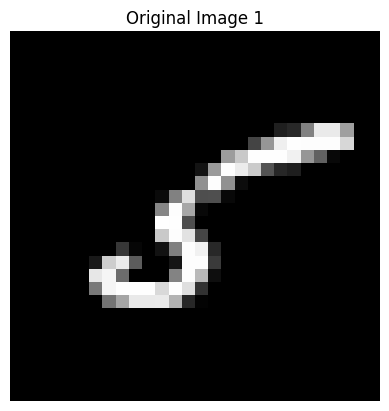

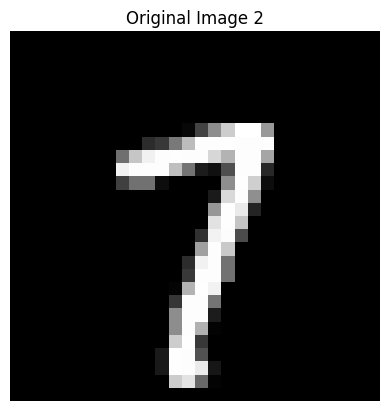

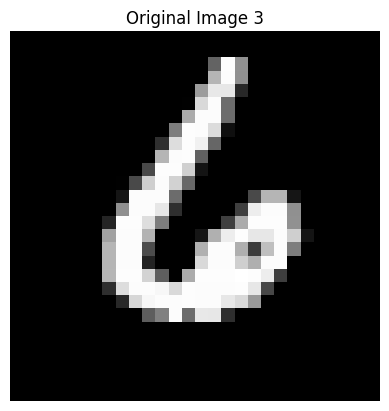

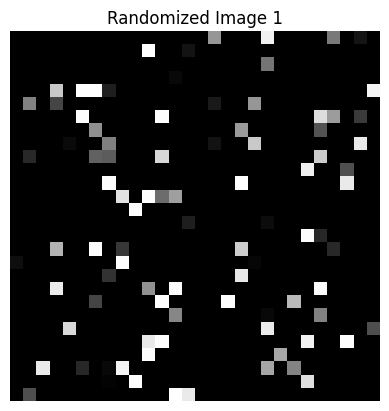

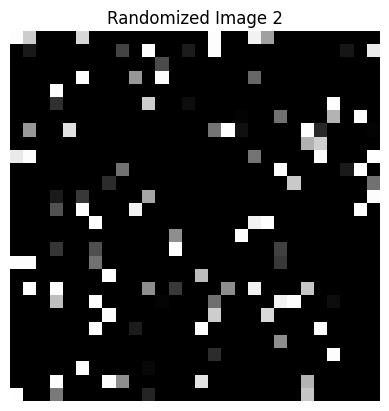

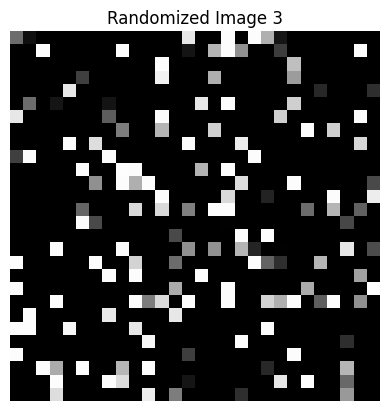


--- Trial 1 ---
Epoch 1/16, Loss: 0.43534914182145584
Epoch 2/16, Loss: 0.18449785375395722
Epoch 3/16, Loss: 0.14230093437590516
Epoch 4/16, Loss: 0.11872164314306939
Epoch 5/16, Loss: 0.10189680834494427
Epoch 6/16, Loss: 0.08924708344555621
Epoch 7/16, Loss: 0.07923920526396859
Epoch 8/16, Loss: 0.07274052733307215
Epoch 9/16, Loss: 0.06307919393562723
Epoch 10/16, Loss: 0.05883342709559486
Epoch 11/16, Loss: 0.055131322300432176
Epoch 12/16, Loss: 0.04766915745265943
Epoch 13/16, Loss: 0.05065304097847448
Epoch 14/16, Loss: 0.048521952395383115
Epoch 15/16, Loss: 0.03998846862626207
Epoch 16/16, Loss: 0.0416812733072061
Accuracy: 96.09%

--- Trial 2 ---
Epoch 1/16, Loss: 0.4595777462405373
Epoch 2/16, Loss: 0.19270338748853758
Epoch 3/16, Loss: 0.15253730913473248
Epoch 4/16, Loss: 0.12836658131720416
Epoch 5/16, Loss: 0.10974138353872838
Epoch 6/16, Loss: 0.10343439351898362
Epoch 7/16, Loss: 0.0896460440472515
Epoch 8/16, Loss: 0.08464383863946244
Epoch 9/16, Loss: 0.07400748420

95.86600000000001

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.manifold import TSNE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random

def plot_image(image, title=""):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment

def apply_randomized_embedding(trainset, testset):
    # Concatenate training and testing data
    full_data = torch.cat((trainset.data, testset.data), dim=0)
    full_labels = torch.cat((trainset.targets, testset.targets), dim=0)

    # Flatten images and randomize the features
    flattened_data = full_data.view(full_data.size(0), -1).numpy()
    randomized_data = flattened_data[:, np.random.permutation(flattened_data.shape[1])]
    img_idx1 = 11
    img_idx2 = 96
    img_idx3 = 261 # Index of the image to display (you can modify this for other images)
    original_image1 = full_data[img_idx1].cpu().numpy()  # Move back to CPU for visualization
    original_image2 = full_data[img_idx2].cpu().numpy()
    original_image3 = full_data[img_idx3].cpu().numpy()

    # Plot the original image
    plot_image(original_image1, "Original Image 1")
    plot_image(original_image2, "Original Image 2")
    plot_image(original_image3, "Original Image 3")

    # Reshape randomized data back into 28x28 grids
    reshaped_data = randomized_data.reshape(-1, 1, 28, 28)
    randomized_image1 = randomized_data[img_idx1].reshape(28, 28)
    randomized_image2 = randomized_data[img_idx2].reshape(28, 28)
    randomized_image3 = randomized_data[img_idx3].reshape(28, 28)

    plot_image(randomized_image1, "Randomized Image 1")
    plot_image(randomized_image2, "Randomized Image 2")
    plot_image(randomized_image3, "Randomized Image 3")

    # Split back into training and testing sets
    train_data = torch.tensor(reshaped_data[:len(trainset)], dtype=torch.float32)
    train_labels = trainset.targets
    test_data = torch.tensor(reshaped_data[len(trainset):], dtype=torch.float32)
    test_labels = testset.targets

    return train_data, train_labels, test_data, test_labels

# Preprocess the datasets for the control experiment
train_data, train_labels, test_data, test_labels = apply_randomized_embedding(trainset, testset)

# Create dataloader with preprocessed data
trainloader = torch.utils.data.DataLoader(list(zip(train_data, train_labels)), batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(list(zip(test_data, test_labels)), batch_size=64, shuffle=False)

# Define the 4-layer CNN model
class FourLayerCNN(nn.Module):
    def __init__(self):
        super(FourLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(256 * 1 * 1, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv3(x))
        x = self.maxpool(x)
        x = self.relu(self.conv4(x))
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
def initialize_model():
    model = FourLayerCNN().to(device)  # Move model to GPU/CPU
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    return model, criterion, optimizer

# Train the model
def train_model(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            # Move images and labels to GPU/CPU
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}")

# Evaluate the model
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move images and labels to GPU/CPU
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')
    return accuracy


# Run the model multiple times and calculate the average accuracy
def run_multiple_trials(num_trials, epochs):
    accuracies = []
    for trial in range(num_trials):
        print(f"\n--- Trial {trial + 1} ---")
        model, criterion, optimizer = initialize_model()
        train_model(model, trainloader, criterion, optimizer, epochs)
        accuracy = evaluate_model(model, testloader)
        accuracies.append(accuracy)

    avg_accuracy = np.mean(accuracies)
    print(f"\nAverage Accuracy over {num_trials} trials: {avg_accuracy}%")
    return avg_accuracy

# Execute the trials
run_multiple_trials(10, 16)
